In [1]:
import matplotlib.pyplot as plt
import timeit
from cryptography.hazmat.primitives.ciphers.aead import AESGCM, ChaCha20Poly1305
from cryptography.hazmat.primitives.ciphers import Cipher, algorithms, modes
from cryptography.hazmat.backends import default_backend
from cryptography.fernet import Fernet, MultiFernet
import os 
import secrets 

In [2]:
def aes_gcm_encrypt(key, nonce, plaintext):
    encryptor = AESGCM(key)
    aad = b'authenticated but unencrypted'
    ciphertext = encryptor.encrypt(nonce, plaintext, associated_data=aad)
    return ciphertext

def aes_cbc_encrypt(key, iv, plaintext):
    backend = default_backend()
    cipher = Cipher(algorithms.AES(key), modes.CBC(iv), backend=backend)
    encryptor = cipher.encryptor()
    ciphertext = encryptor.update(plaintext) + encryptor.finalize()
    return ciphertext

def chacha_encrypt(key, nonce, plaintext):
    aad = b"authenticated but unencrypted data"
    encryptor = ChaCha20Poly1305(key)
    ciphertext = encryptor.encrypt(nonce, plaintext, associated_data=aad)
    return ciphertext

def fernet_encrypt(key, plaintext): 
    encryptor = Fernet(key)
    ciphertext = encryptor.encrypt(plaintext)
    print(ciphertext)
    return ciphertext

def multifernet_encrypt(key1, key2, plaintext):
    encryptor = MultiFernet([key1, key2])
    ciphertext = encryptor.encrypt(plaintext)
    return ciphertext

In [3]:
def random_text_generator(size):
    return secrets.token_bytes(size)

text1 = random_text_generator(16)
text2 = random_text_generator(32)
text3 = random_text_generator(48)
text4 = random_text_generator(64)
text5 = random_text_generator(128)
text6 = random_text_generator(256)

print(text1)
print(text2)
print(text3)
print(text4)
print(text5)
print(text6)

b'Q\x94,\xbf\xa8\xd4\xd8x\xbd\xe2\x8a`\x0b\x93,~'
b'-\xf1~\xd6^\xf6]f\x1f8\xfd\x92#\x07\xcc\x93\x7f\xcd7\xd1\xdbC\xf1\xe6\xec\xdffI\x1e\xf3\x9bw'
b'\x98\xce\xb3-X\xc8\xc9j\xde\xa5\xd7N\xd3\xa7\xa3\x01\x0c\xbej\x0e\xd9Zty<0>\xde\x8f\xaay\x13\x97{\xad|\xb9\x89\xf2ha\xfdAp\x8dD\xda\xc9'
b'\xe3\xfa\xac\xeb9\xba\xb1O\x10U\x89$\x918\xdb1\x9bF\x01a\xf4&\xc3r\x88\x7fE\xec\xec\xab]\xc4\xc9\x8c`\x179\xe8\xc4\xf1X\xb15\xdc\xc4~\x02\x80\xcaD&\x0b\x12^\x08\x9b\x993|\xf2M\xfb\x17F'
b"7\xff8&\xb9p\xf8E\xe3'\xef\x06\xb2\x89u8\\\xba\x03\xefZw\xfaqyx\xba\xcb\xb2\xd78\xc9)\xa2\xea\x0fP\x94\x02\xd5\xf9\xf1\x88\x9fB\x87I\xd9\x85\x06{P\xda\xb3\xbb\xfe\xd02gn\xe8\x7f]\xf8\xec\x1c\xb9\x7f\xa3a\x14Qe\xfb\xb4E\xed-XB\xc5v\xf2u\x7f\x04\xa4\xe0\xdd\x87\x94\xd1l`\xc9\xc7o\xc3:\xfd\xb7\x1f\xb8wZ\x89\xcaxrb\x92\xb3\x8df\x03V\x7fs\x9fL\xd4/\x95F\x91\x04\x9f\xf8"
b'\r\xce\xa3\xb1\xc7\xcd:X\xd2J\x91\xf1H\x89j\x8e\xc45\xb1:\xf4\x87EE9\x03\xbcgW\xff\xbd\xf7f\xb6\xda\r(\x08sp\xdd<f\xd0lc>\xe9\xcb\x8a\x86\xfe\xaa\xd5M\xef\

In [4]:
key = AESGCM.generate_key(bit_length=256)
nonce = os.urandom(12)
iv = os.urandom(16)
chachakey = ChaCha20Poly1305.generate_key()
fernetkey = Fernet.generate_key()
fernetkey2 = Fernet.generate_key()

In [5]:
aes_gcm_time1 = timeit.timeit(lambda: aes_gcm_encrypt(key, nonce, text1), number=100)
aes_gcm_time2 = timeit.timeit(lambda: aes_gcm_encrypt(key, nonce, text2), number=100)
aes_gcm_time3 = timeit.timeit(lambda: aes_gcm_encrypt(key, nonce, text3), number=100)
aes_gcm_time4 = timeit.timeit(lambda: aes_gcm_encrypt(key, nonce, text4), number=100)
aes_gcm_time5 = timeit.timeit(lambda: aes_gcm_encrypt(key, nonce, text5), number=100)
aes_gcm_time6 = timeit.timeit(lambda: aes_gcm_encrypt(key, nonce, text6), number=100)

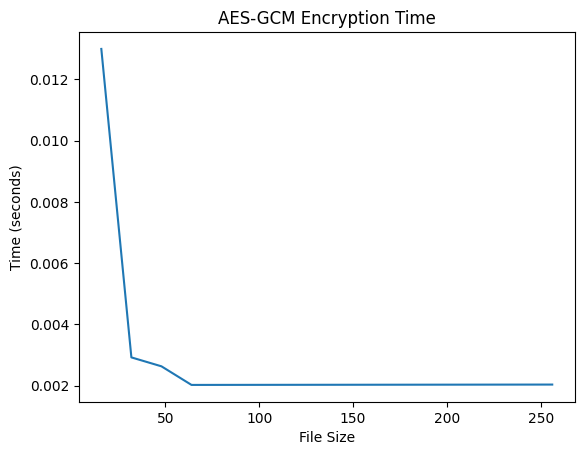

In [6]:
x_axis = [16, 32, 48, 64, 128, 256] #file_size
times = [aes_gcm_time1, aes_gcm_time2, aes_gcm_time3, aes_gcm_time4, aes_gcm_time5, aes_gcm_time6]
plt.plot(x_axis, times)
plt.title('AES-GCM Encryption Time')
plt.ylabel('Time (seconds)')
plt.xlabel('File Size')
plt.show()

In [7]:
chacha_time_1 = timeit.timeit(lambda: chacha_encrypt(chachakey, nonce, text1), number=100)
chacha_time_2 = timeit.timeit(lambda: chacha_encrypt(chachakey, nonce, text2), number=100)
chacha_time_3 = timeit.timeit(lambda: chacha_encrypt(chachakey, nonce, text3), number=100)
chacha_time_4 = timeit.timeit(lambda: chacha_encrypt(chachakey, nonce, text4), number=100)
chacha_time_5 = timeit.timeit(lambda: chacha_encrypt(chachakey, nonce, text5), number=100)
chacha_time_6 = timeit.timeit(lambda: chacha_encrypt(chachakey, nonce, text6), number=100)

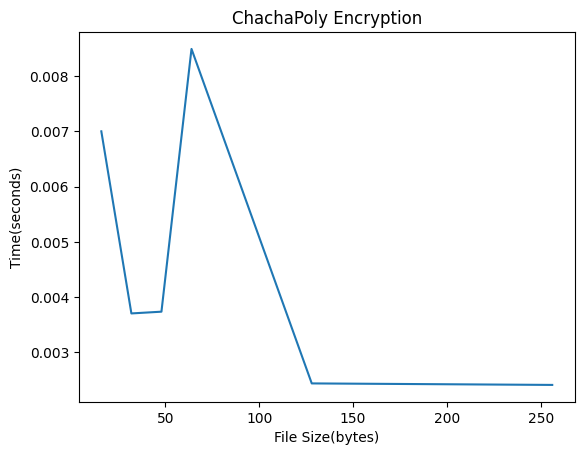

In [8]:
x_axis = [16, 32, 48, 64, 128, 256]
times = [chacha_time_1, chacha_time_2, chacha_time_3, chacha_time_4, chacha_time_5, chacha_time_6]
plt.plot(x_axis, times)
plt.title('ChachaPoly Encryption')
plt.xlabel('File Size(bytes)')
plt.ylabel('Time(seconds)')
plt.show()


In [9]:
fernet_time_1 = timeit.timeit(lambda: fernet_encrypt(fernetkey, text1), number=100)
fernet_time_2 = timeit.timeit(lambda: fernet_encrypt(fernetkey, text2), number=100)
fernet_time_3 = timeit.timeit(lambda: fernet_encrypt(fernetkey, text3), number=100)
fernet_time_4 = timeit.timeit(lambda: fernet_encrypt(fernetkey, text4), number=100)
fernet_time_5 = timeit.timeit(lambda: fernet_encrypt(fernetkey, text5), number=100)
fernet_time_6 = timeit.timeit(lambda: fernet_encrypt(fernetkey, text6), number=100)

b'gAAAAABkeEF8FFQ_Ae44xwNWbMkQnkrPuNOTgmozuULq9BkKjRZA5p6tY5il3Na5mmRqthCWrC0znUpIXGK5-E4cflKwqqfoksb-pYbZqCFKQcGq2T22GCc='
b'gAAAAABkeEF8spkJkGR6rk_RD_EVDpe5a6gnN3ye3yGZ7OzBh30mQ8FdBCy4xzYDiLPFIWe_-_prd1s0A6XD1uG5gB7WPl1tm3I-w0n1YF9eMG-seeIVoy4='
b'gAAAAABkeEF8Xw1uisb-hRQrZbl0HQrG5ko4nwGquew6XL_cGBoIcAIDCrAsn9pYHrdmbiSmOVJaLfdRNpjP21Jo-eUNiPUJoBaH0if1hHj0w6DnUcd9hB8='
b'gAAAAABkeEF8hhHu6nckuTDTgepc_E70ajCxmM2aJDwpGlGCiFk2wmOFKW22920cbPoY4-qgLMck9yvZLiRLhc7GPa8a72a-Ljt1oaiNQHHNjITQNOBcR9s='
b'gAAAAABkeEF86Pt8BSWHoUIJsGBeWT-F27NMF5KEZcWaV-KGuNP6GWDRuR5JLMscJCwpz2ZAdK3E5p02pIfKTxVQX3ZdA90easuIElqtvuOVzy5YcxkkxGQ='
b'gAAAAABkeEF8xACaGKzXkTum0uTW_6POMJluq3Za0K99T5hxoYn9zGsIDbxg0Djiya7IDknVCp4eHuQ0Nr7WS0rQredpls-jLMWAxK2imTKYpCc7-9QQngU='
b'gAAAAABkeEF81pthjsgv5XzNRCa4yQ6jq59-sDPzjIDc0YiW6HBIbuDHV2cq9tMUDXkQkiE_nG1TmMf66ReIUYOskRAsayyNUTeo2VcAOCKk7QgYPUSlzh8='
b'gAAAAABkeEF8nLV6NpkeRcHdlNxTfbmmCbknPDV7VPCZHlkuqq6xv3jx-bUGStt6b6mJK3_R0U7OYJIPjGkVWgpMEsuH9Vil60hSEWN2DalfGp3PEytzTtI='
b'gAAAAA

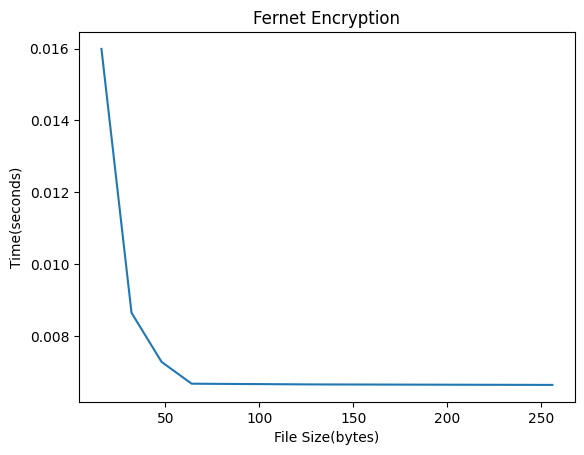

In [10]:
x_axis = [16, 32, 48, 64, 128, 256]
times = [fernet_time_1, fernet_time_2, fernet_time_3, fernet_time_4, fernet_time_5, fernet_time_6]
plt.plot(x_axis, times)
plt.title('Fernet Encryption')
plt.xlabel('File Size(bytes)')
plt.ylabel('Time(seconds)')
plt.show()

In [72]:
multifernet_time_1 = timeit.timeit(lambda: multifernet_encrypt(fernetkey,fernetkey2, text1), number=100)
multifernet_time_2 = timeit.timeit(lambda: multifernet_encrypt(fernetkey, fernetkey2, text2), number=100)
multifernet_time_3 = timeit.timeit(lambda: multifernet_encrypt(fernetkey, fernetkey2, text3), number=100)
multifernet_time_4 = timeit.timeit(lambda: multifernet_encrypt(fernetkey, fernetkey2, text4), number=100)
multifernet_time_5 = timeit.timeit(lambda: multifernet_encrypt(fernetkey, fernetkey2, text5), number=100)
multifernet_time_6 = timeit.timeit(lambda: multifernet_encrypt(fernetkey, fernetkey2, text6), number=100)

AttributeError: 'bytes' object has no attribute 'encrypt_at_time'